In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 100
plt.rcParams['figure.dpi'] = 100

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 300)

dir_results = './results/'

## 1. Clean models

In [30]:
df_clean = pd.read_csv(dir_results + 'eval_clean.csv', index_col = 0)

In [31]:
temp1 = df_clean[df_clean['dataset'] == 'cifar10'][['model_name', 'top1acc']]
temp2 = df_clean[df_clean['dataset'] == 'svhn'][['model_name', 'top1acc']]

temp1['top1acc'] = temp1['top1acc'] * 100
temp2['top1acc'] = temp2['top1acc'] * 100

In [32]:
pd.merge(temp1, temp2, on = 'model_name').round(2)

,model_name,top1acc_x,top1acc_y
0,resnet18,94.02,94.26
1,resnet18_sfP,79.51,96.81
2,resnet18_sfP-mixup,86.09,96.82
3,resnet18_sfP-cutout,83.54,97.11
4,resnet18_P2-0.3,91.65,93.67
5,resnet18_P2-0.6,76.55,89.51
6,resnet18_P2-0.9,14.77,37.64
7,resnet18_P3-0.3,93.52,93.61
8,resnet18_P3-0.6,91.49,91.53
9,resnet18_P3-0.9,61.01,49.70


In [9]:
# EZ LaTeX
print(pd.merge(temp1, temp2, on = 'model_name').round(2).to_latex(index = False))

\begin{tabular}{lrr}
\toprule
          model\_name &  top1acc\_x &  top1acc\_y \\
\midrule
            resnet18 &      94.02 &      94.26 \\
        resnet18\_sfP &      79.51 &      96.81 \\
  resnet18\_sfP-mixup &      86.09 &      96.82 \\
 resnet18\_sfP-cutout &      83.54 &      97.11 \\
     resnet18\_P2-0.3 &      91.65 &      93.67 \\
     resnet18\_P2-0.6 &      76.55 &      89.51 \\
     resnet18\_P2-0.9 &      14.77 &      37.64 \\
     resnet18\_P3-0.3 &      93.52 &      93.61 \\
     resnet18\_P3-0.6 &      91.49 &      91.53 \\
     resnet18\_P3-0.9 &      61.01 &      49.70 \\
     resnet18\_P4-0.3 &      94.09 &      94.14 \\
     resnet18\_P4-0.6 &      93.98 &      93.74 \\
     resnet18\_P4-0.9 &      93.00 &      87.62 \\
         resnet20\_Q2 &      90.47 &      95.46 \\
         resnet20\_Q3 &      92.57 &      95.31 \\
         resnet20\_Q4 &      92.20 &      94.99 \\
\bottomrule
\end{tabular}



## 2. Evaluate noise (chessboard, random)

In [25]:
df_noise = pd.read_csv(dir_results + 'eval_noise.csv', index_col = 0)

In [26]:
df_noise

,model_name,dataset,atk_name,atk_param,eps,top1acc,top5acc,UER,label_dist0,label_dist1,label_dist2,label_dist3,label_dist4,label_dist5,label_dist6,label_dist7,label_dist8,label_dist9
0,resnet18,cifar10,chess,-1,2,0.844600,0.990800,0.155400,0.089700,0.100800,0.117700,0.165800,0.085000,0.070200,0.103600,0.079500,0.095800,0.091900
1,resnet18,cifar10,chess,-1,4,0.640900,0.930500,0.359100,0.135200,0.096700,0.130200,0.282900,0.043200,0.030500,0.080400,0.044100,0.077600,0.079200
2,resnet18,cifar10,chess,-1,6,0.412600,0.794100,0.587400,0.301300,0.078500,0.083800,0.272600,0.012400,0.006600,0.038700,0.014100,0.058100,0.133900
3,resnet18,cifar10,chess,-1,8,0.232600,0.646600,0.767400,0.397800,0.050900,0.027700,0.094500,0.001800,0.000800,0.010500,0.002000,0.034800,0.379200
4,resnet18,cifar10,chess,-1,10,0.143100,0.570700,0.856900,0.219700,0.024800,0.006300,0.010500,0.000000,0.000000,0.002300,0.000100,0.015300,0.721000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,resnet20_Q4,svhn,random,-1,4,0.948333,0.994660,0.051667,0.067302,0.199140,0.159919,0.109481,0.097150,0.090850,0.077366,0.076175,0.061117,0.061501
20,resnet20_Q4,svhn,random,-1,6,0.947757,0.994238,0.052243,0.066879,0.199447,0.159957,0.109289,0.096804,0.090888,0.077789,0.076214,0.061040,0.061693
21,resnet20_Q4,svhn,random,-1,8,0.945644,0.993931,0.054356,0.066380,0.199908,0.160149,0.109481,0.096766,0.091503,0.077136,0.076406,0.060925,0.061348
22,resnet20_Q4,svhn,random,-1,10,0.943185,0.993700,0.056815,0.065804,0.199485,0.160034,0.109096,0.096612,0.092617,0.076944,0.076368,0.061424,0.061616


In [14]:
temp1 = df_noise[df_noise['dataset'] == 'cifar10'][['model_name', 'top1acc']]
temp2 = df_noise[df_noise['dataset'] == 'svhn'][['model_name', 'top1acc']]

temp1['top1acc'] = temp1['top1acc'] * 100
temp2['top1acc'] = temp2['top1acc'] * 100

In [15]:
pd.merge(temp1, temp2, on = 'model_name').round(2)

,model_name,top1acc_x,top1acc_y
0,resnet18,84.46,94.25
1,resnet18,84.46,94.25
2,resnet18,84.46,94.23
3,resnet18,84.46,94.23
4,resnet18,84.46,94.22
...,...,...,...
2299,resnet20_Q4,67.59,94.83
2300,resnet20_Q4,67.59,94.78
2301,resnet20_Q4,67.59,94.56
2302,resnet20_Q4,67.59,94.32


In [17]:
model_names = list(df_noise['model_name'].unique())

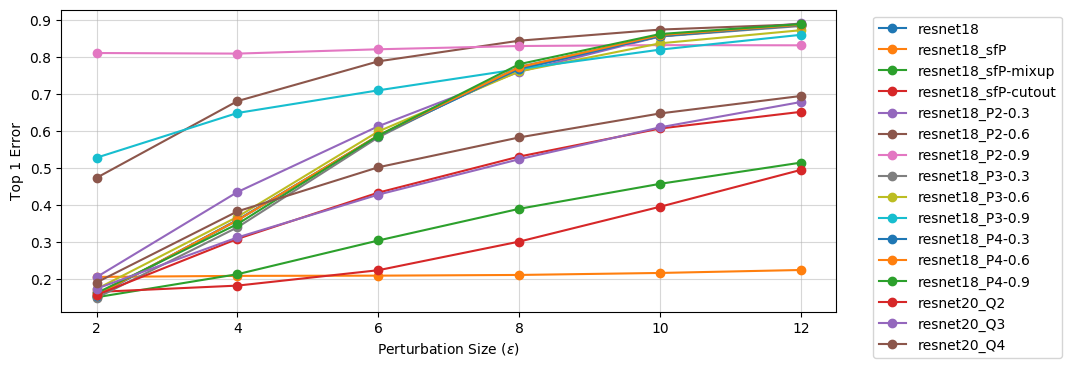

In [18]:
dataset = 'cifar10'
atk_name = 'chess'

plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_noise[(df_noise['model_name'] == model) & (df_noise['dataset'] == dataset) & (df_noise['atk_name'] == atk_name)]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)
    
plt.legend(bbox_to_anchor=(1.3, 1))

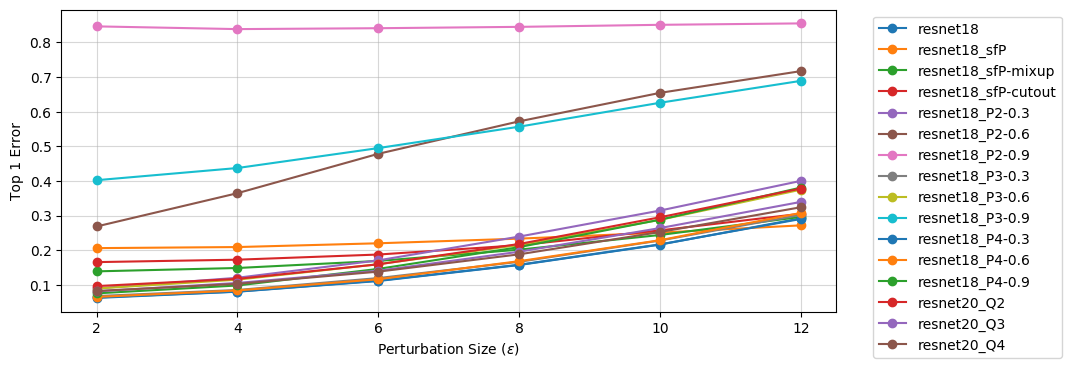

In [19]:
dataset = 'cifar10'
atk_name = 'random'

plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_noise[(df_noise['model_name'] == model) & (df_noise['dataset'] == dataset) & (df_noise['atk_name'] == atk_name)]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)
    
plt.legend(bbox_to_anchor=(1.3, 1))

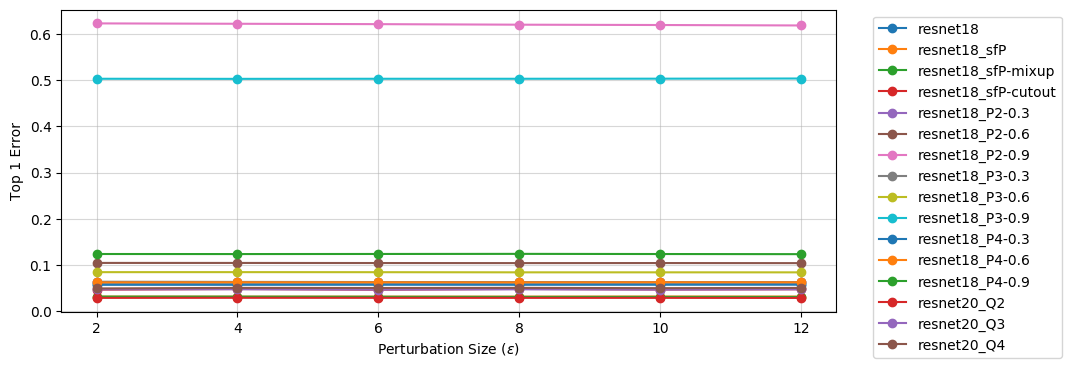

In [20]:
dataset = 'svhn'
atk_name = 'chess'

plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_noise[(df_noise['model_name'] == model) & (df_noise['dataset'] == dataset) & (df_noise['atk_name'] == atk_name)]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)
    
plt.legend(bbox_to_anchor=(1.3, 1))

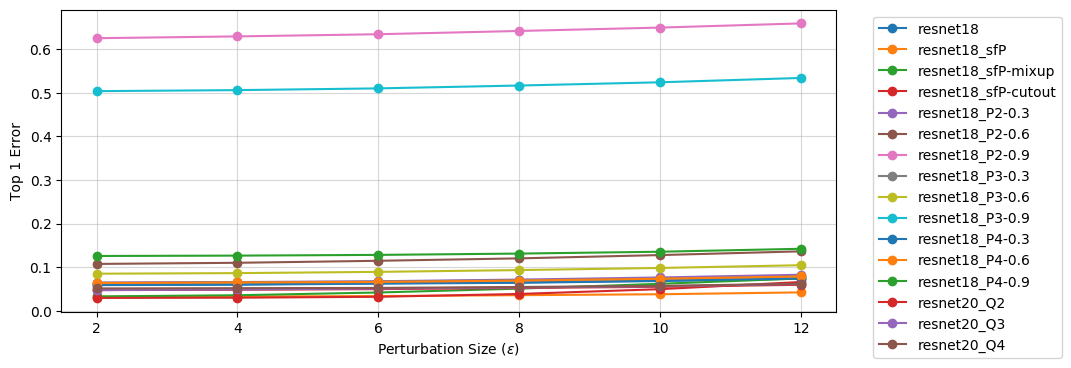

In [21]:
dataset = 'svhn'
atk_name = 'random'

plt.figure(figsize = (10, 4))

for model in model_names:
    temp = df_noise[(df_noise['model_name'] == model) & (df_noise['dataset'] == dataset) & (df_noise['atk_name'] == atk_name)]
    plt.grid(axis = 'both', alpha = 0.5)
    plt.xlabel(r'Perturbation Size ($\varepsilon$)')
    plt.ylabel('Top 1 Error')
    plt.plot(temp['eps'], temp['UER'], marker = 'o', label = model)
    
plt.legend(bbox_to_anchor=(1.3, 1))